In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 3 mat analysis

In [2]:
attr001 = torch.load('matrices/attr_for1394_model1.pt')
attr002 = torch.load('matrices/attr_for1394_model2.pt')
attr003 = torch.load('matrices/attr_for1394_model3.pt')

In [3]:
attr001_np = attr001.detach().cpu().numpy().squeeze()
attr002_np = attr002.detach().cpu().numpy().squeeze()
attr003_np = attr003.detach().cpu().numpy().squeeze()

In [4]:
from matplotlib.colors import TwoSlopeNorm

def plot_attr_edit(attr, method=None):
    attr_np = attr.detach().cpu().numpy().squeeze()
    # print(attr_np.shape)
    # print(np.min(attr_np), np.max(attr_np))
    # Get the dimensions of the matrix

    # Assuming attr_np is already defined
    rows, cols = attr_np.shape

    # Set center value at 0.5 for viridis colormap
    norm = TwoSlopeNorm(vmin=attr_np.min(), vcenter=0.5, vmax=attr_np.max())

    plt.figure(figsize=(10, 2))
    im = plt.imshow(attr_np.T, aspect='auto', interpolation='none', cmap='viridis', 
                    # norm=norm, 
                    vmin=0.4, vmax=0.6
                   )
    plt.colorbar(im, shrink=0.8, label='Attribution\nScore')
    plt.title(f'{method}', fontsize=12)
    plt.xlabel("Timesteps", fontsize=12)
    plt.ylabel("Features", fontsize=12)

    # Set number of ticks you want (ensure first and last are always included)
    num_xticks = 9  # adjust as needed
    num_yticks = 5   # adjust as needed

    # Compute tick positions using linspace so that first and last indices are included.
    xtick_positions = np.linspace(0, rows - 1, num_xticks, dtype=int)
    ytick_positions = np.linspace(0, cols - 1, num_yticks, dtype=int)

    # Adjust xtick labels to range from 1 to 288
    time_labels = np.linspace(1, 288, num_xticks, dtype=int)

    plt.xticks(xtick_positions, time_labels)
    # plt.yticks(ytick_positions)

    plt.tight_layout()
    plt.show()



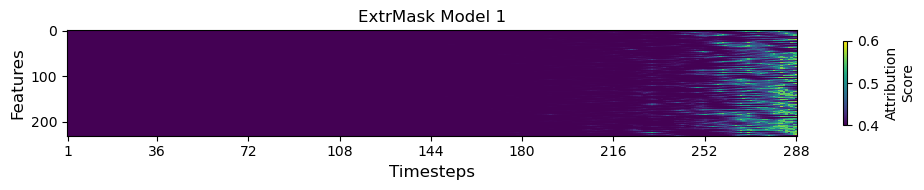

In [5]:
plot_attr_edit(attr001, method='ExtrMask Model 1')

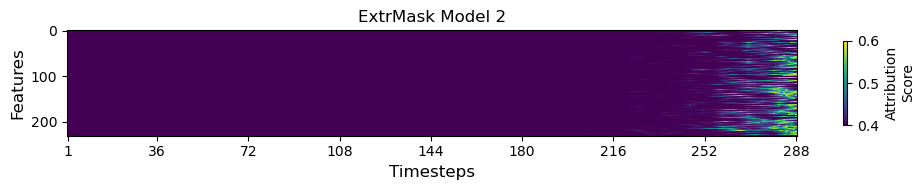

In [6]:
plot_attr_edit(attr002, method='ExtrMask Model 2')

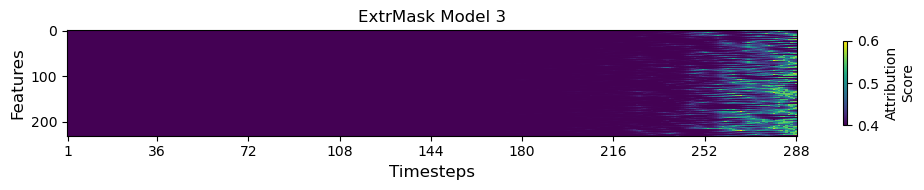

In [7]:
plot_attr_edit(attr003, method='ExtrMask Model 3')

In [9]:
# dtest = torch.load('Mortality/Mtest.pt').detach().cpu().numpy()[1394].squeeze()

In [ ]:
dtest.shape

In [ ]:
min_val = np.min(dtest)
max_val = np.max(dtest)
normalized_matrix = (dtest - min_val) / (max_val - min_val)

In [144]:
# Compute variance along the time axis for each feature
variances = np.var(normalized_matrix, axis=0)

# Set threshold based on percentile (e.g., keep features above the 10th percentile)
percentile_threshold = 90  # Adjust this percentile as needed
var_threshold = np.percentile(variances, percentile_threshold)

# Filter out features with variance below the calculated percentile threshold
non_flat_features = variances > var_threshold
# filtered_data = normalized_matrix[:, non_flat_features.squeeze()]

In [145]:
from matplotlib.colors import TwoSlopeNorm

def plot_attr_edit_np(attr, method=None):
    attr_np = attr
    # print(attr_np.shape)
    # print(np.min(attr_np), np.max(attr_np))
    # Get the dimensions of the matrix

    # Assuming attr_np is already defined
    rows, cols = attr_np.shape

    # Set center value at 0.5 for viridis colormap
    # norm = TwoSlopeNorm(vmin=attr_np.min(), vcenter=0.5, vmax=attr_np.max())

    plt.figure(figsize=(10, 2))
    im = plt.imshow(attr_np.T, aspect='auto', interpolation='none', cmap='viridis', 
                    # norm=norm, 
                    vmin=0.4, vmax=0.6
                   )
    plt.colorbar(im, shrink=0.8, label='Attribution\nScore')
    plt.title(f'{method}', fontsize=12)
    plt.xlabel("Timesteps", fontsize=12)
    plt.ylabel("Features", fontsize=12)

    # Set number of ticks you want (ensure first and last are always included)
    num_xticks = 9  # adjust as needed
    num_yticks = 5   # adjust as needed

    # Compute tick positions using linspace so that first and last indices are included.
    xtick_positions = np.linspace(0, rows - 1, num_xticks, dtype=int)
    # ytick_positions = np.linspace(0, cols - 1, num_yticks, dtype=int)

    # Adjust xtick labels to range from 1 to 288
    time_labels = np.linspace(1, 288, num_xticks, dtype=int)

    plt.xticks(xtick_positions, time_labels)
    # plt.yticks(ytick_positions)
    plt.yticks([])  # Hide y ticks

    plt.tight_layout()
    plt.show()



In [146]:
filtered_attr001 = attr001_np[:,non_flat_features.squeeze()]
filtered_attr002 = attr002_np[:,non_flat_features.squeeze()]
filtered_attr003 = attr003_np[:,non_flat_features.squeeze()]

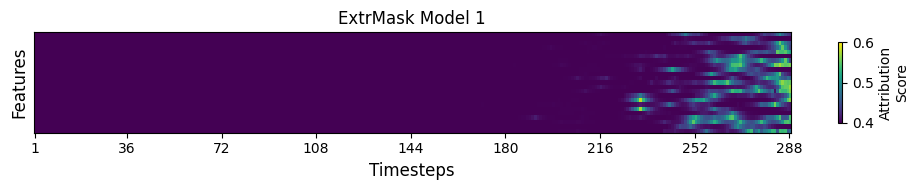

In [147]:
plot_attr_edit_np(filtered_attr001, method='ExtrMask Model 1')

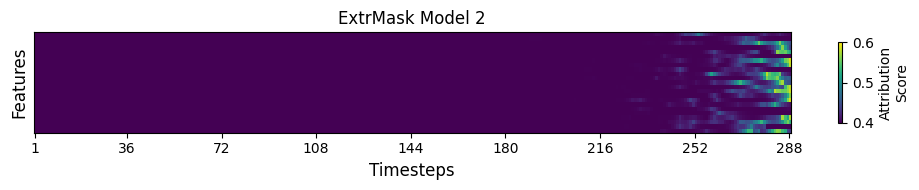

In [148]:
plot_attr_edit_np(filtered_attr002, method='ExtrMask Model 2')

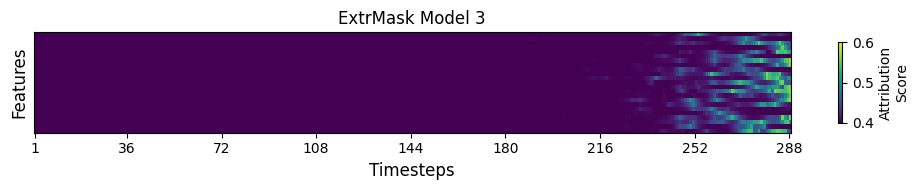

In [149]:
plot_attr_edit_np(filtered_attr003, method='ExtrMask Model 3')

In [150]:
filtered_attr003.shape

(288, 23)

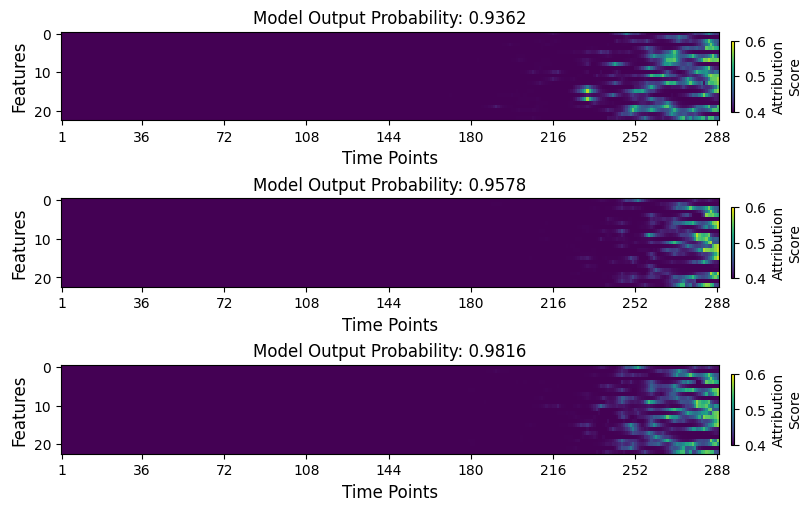

In [181]:
# Assume matrices attr_np1, attr_np2, attr_np3 are your (288,23) matrices
matrices = [filtered_attr001, filtered_attr002, filtered_attr003]
methods = ['Model Output Probability: 0.9362', 
           'Model Output Probability: 0.9578', 
           'Model Output Probability: 0.9816']  # replace these with actual method names

fig, axes = plt.subplots(3, 1, figsize=(8, 5), constrained_layout=True)

num_xticks = 9
xtick_positions = np.linspace(0, matrices[0].shape[0] - 1, num_xticks, dtype=int)
time_labels = np.linspace(1, 288, num_xticks, dtype=int)

for idx, (matrix, method) in enumerate(zip([filtered_attr001, filtered_attr002, filtered_attr003], ['Method 1', 'Method 2', 'Method 3'])):
    ax = axes[idx]
    im = ax.imshow(matrix.T, aspect='auto', interpolation='none', cmap='viridis',
                   # norm=TwoSlopeNorm(vmin=m, vcenter=0.5, vmax=matrix.max())
                   vmin=0.4, vmax=0.6
                  
                  )

    fig.colorbar(im, ax=ax, shrink=0.8, label='Attribution\nScore',pad=0.0)
    ax.set_title(methods[idx], fontsize=12)
    ax.set_xlabel("Time Points", fontsize=12)
    ax.set_ylabel("Features", fontsize=12)
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(time_labels)
    # ax.set_yticks([])

# plt.show()
plt.savefig('ExtremalMask_patterns_filter.png', dpi=500, bbox_inches='tight')

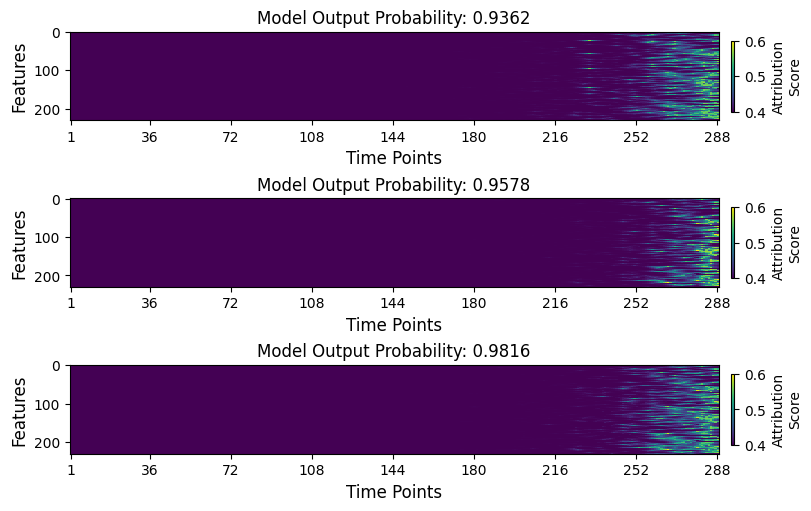

In [178]:
# Assume matrices attr_np1, attr_np2, attr_np3 are your (288,23) matrices
matrices = [attr001_np, attr002_np, attr003_np]
methods = ['Model Output Probability: 0.9362', 
           'Model Output Probability: 0.9578', 
           'Model Output Probability: 0.9816']  # replace these with actual method names

fig, axes = plt.subplots(3, 1, figsize=(8, 5), constrained_layout=True)

num_xticks = 9
xtick_positions = np.linspace(0, matrices[0].shape[0] - 1, num_xticks, dtype=int)
time_labels = np.linspace(1, 288, num_xticks, dtype=int)

for idx, (matrix, method) in enumerate(zip([attr001_np, attr002_np, attr003_np], ['Method 1', 'Method 2', 'Method 3'])):
    ax = axes[idx]
    im = ax.imshow(matrix.T, aspect='auto', interpolation='none', cmap='viridis',
                   # norm=TwoSlopeNorm(vmin=m, vcenter=0.5, vmax=matrix.max())
                   vmin=0.4, vmax=0.6
                  
                  )

    fig.colorbar(im, ax=ax, shrink=0.8, label='Attribution\nScore', pad=0.0)
    ax.set_title(methods[idx], fontsize=12)
    ax.set_xlabel("Time Points", fontsize=12)
    ax.set_ylabel("Features", fontsize=12)
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(time_labels)
    # ax.set_yticks([])

# plt.show()
plt.savefig('ExtremalMask_patterns_all.png', dpi=500, bbox_inches='tight')